In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read the CSV file, can just put the name if it is located in the same folder
df = pd.read_csv("/Users/joshuamarquez/anaconda_projects/Practice/digital_behavior.csv")

In [10]:
# Print the first elements
df.head();

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [12]:
# Gives us statistical information on our variables
df.describe()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,360.437800,49.840000,6.557400,79.51200,121.771800,6.998000,8.988600,8.451800,52.310400
std,58.782476,7.340993,1.192043,23.97974,43.809443,0.618742,0.519104,2.134425,7.943186
min,180.000000,30.000000,3.000000,20.00000,30.000000,5.500000,7.400000,1.000000,34.600000
25%,317.975000,44.000000,5.800000,63.00000,91.875000,6.600000,8.600000,7.275000,46.800000
50%,360.800000,50.000000,6.500000,80.00000,119.550000,7.000000,9.000000,9.700000,51.000000
75%,398.175000,55.000000,7.325000,96.00000,149.500000,7.400000,9.300000,10.000000,56.600000
max,591.200000,72.000000,10.000000,158.00000,296.700000,8.600000,10.000000,10.000000,80.800000


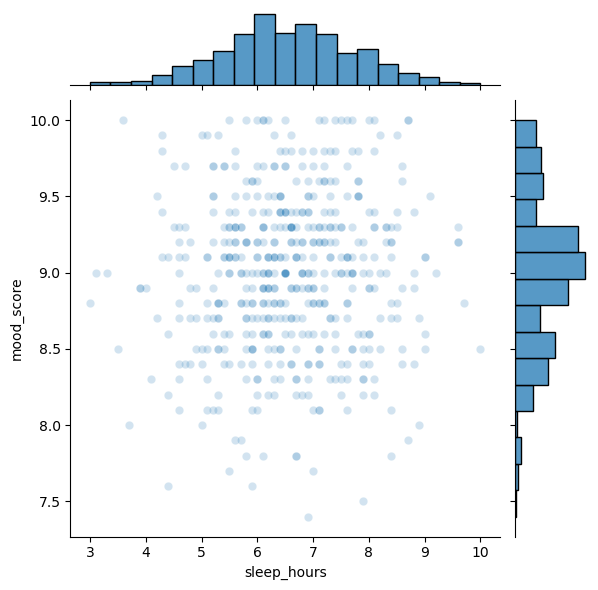

In [13]:
# Exploratory Data Analysis
sns.jointplot(x = "sleep_hours", y = "mood_score", data = df, alpha = 0.2)

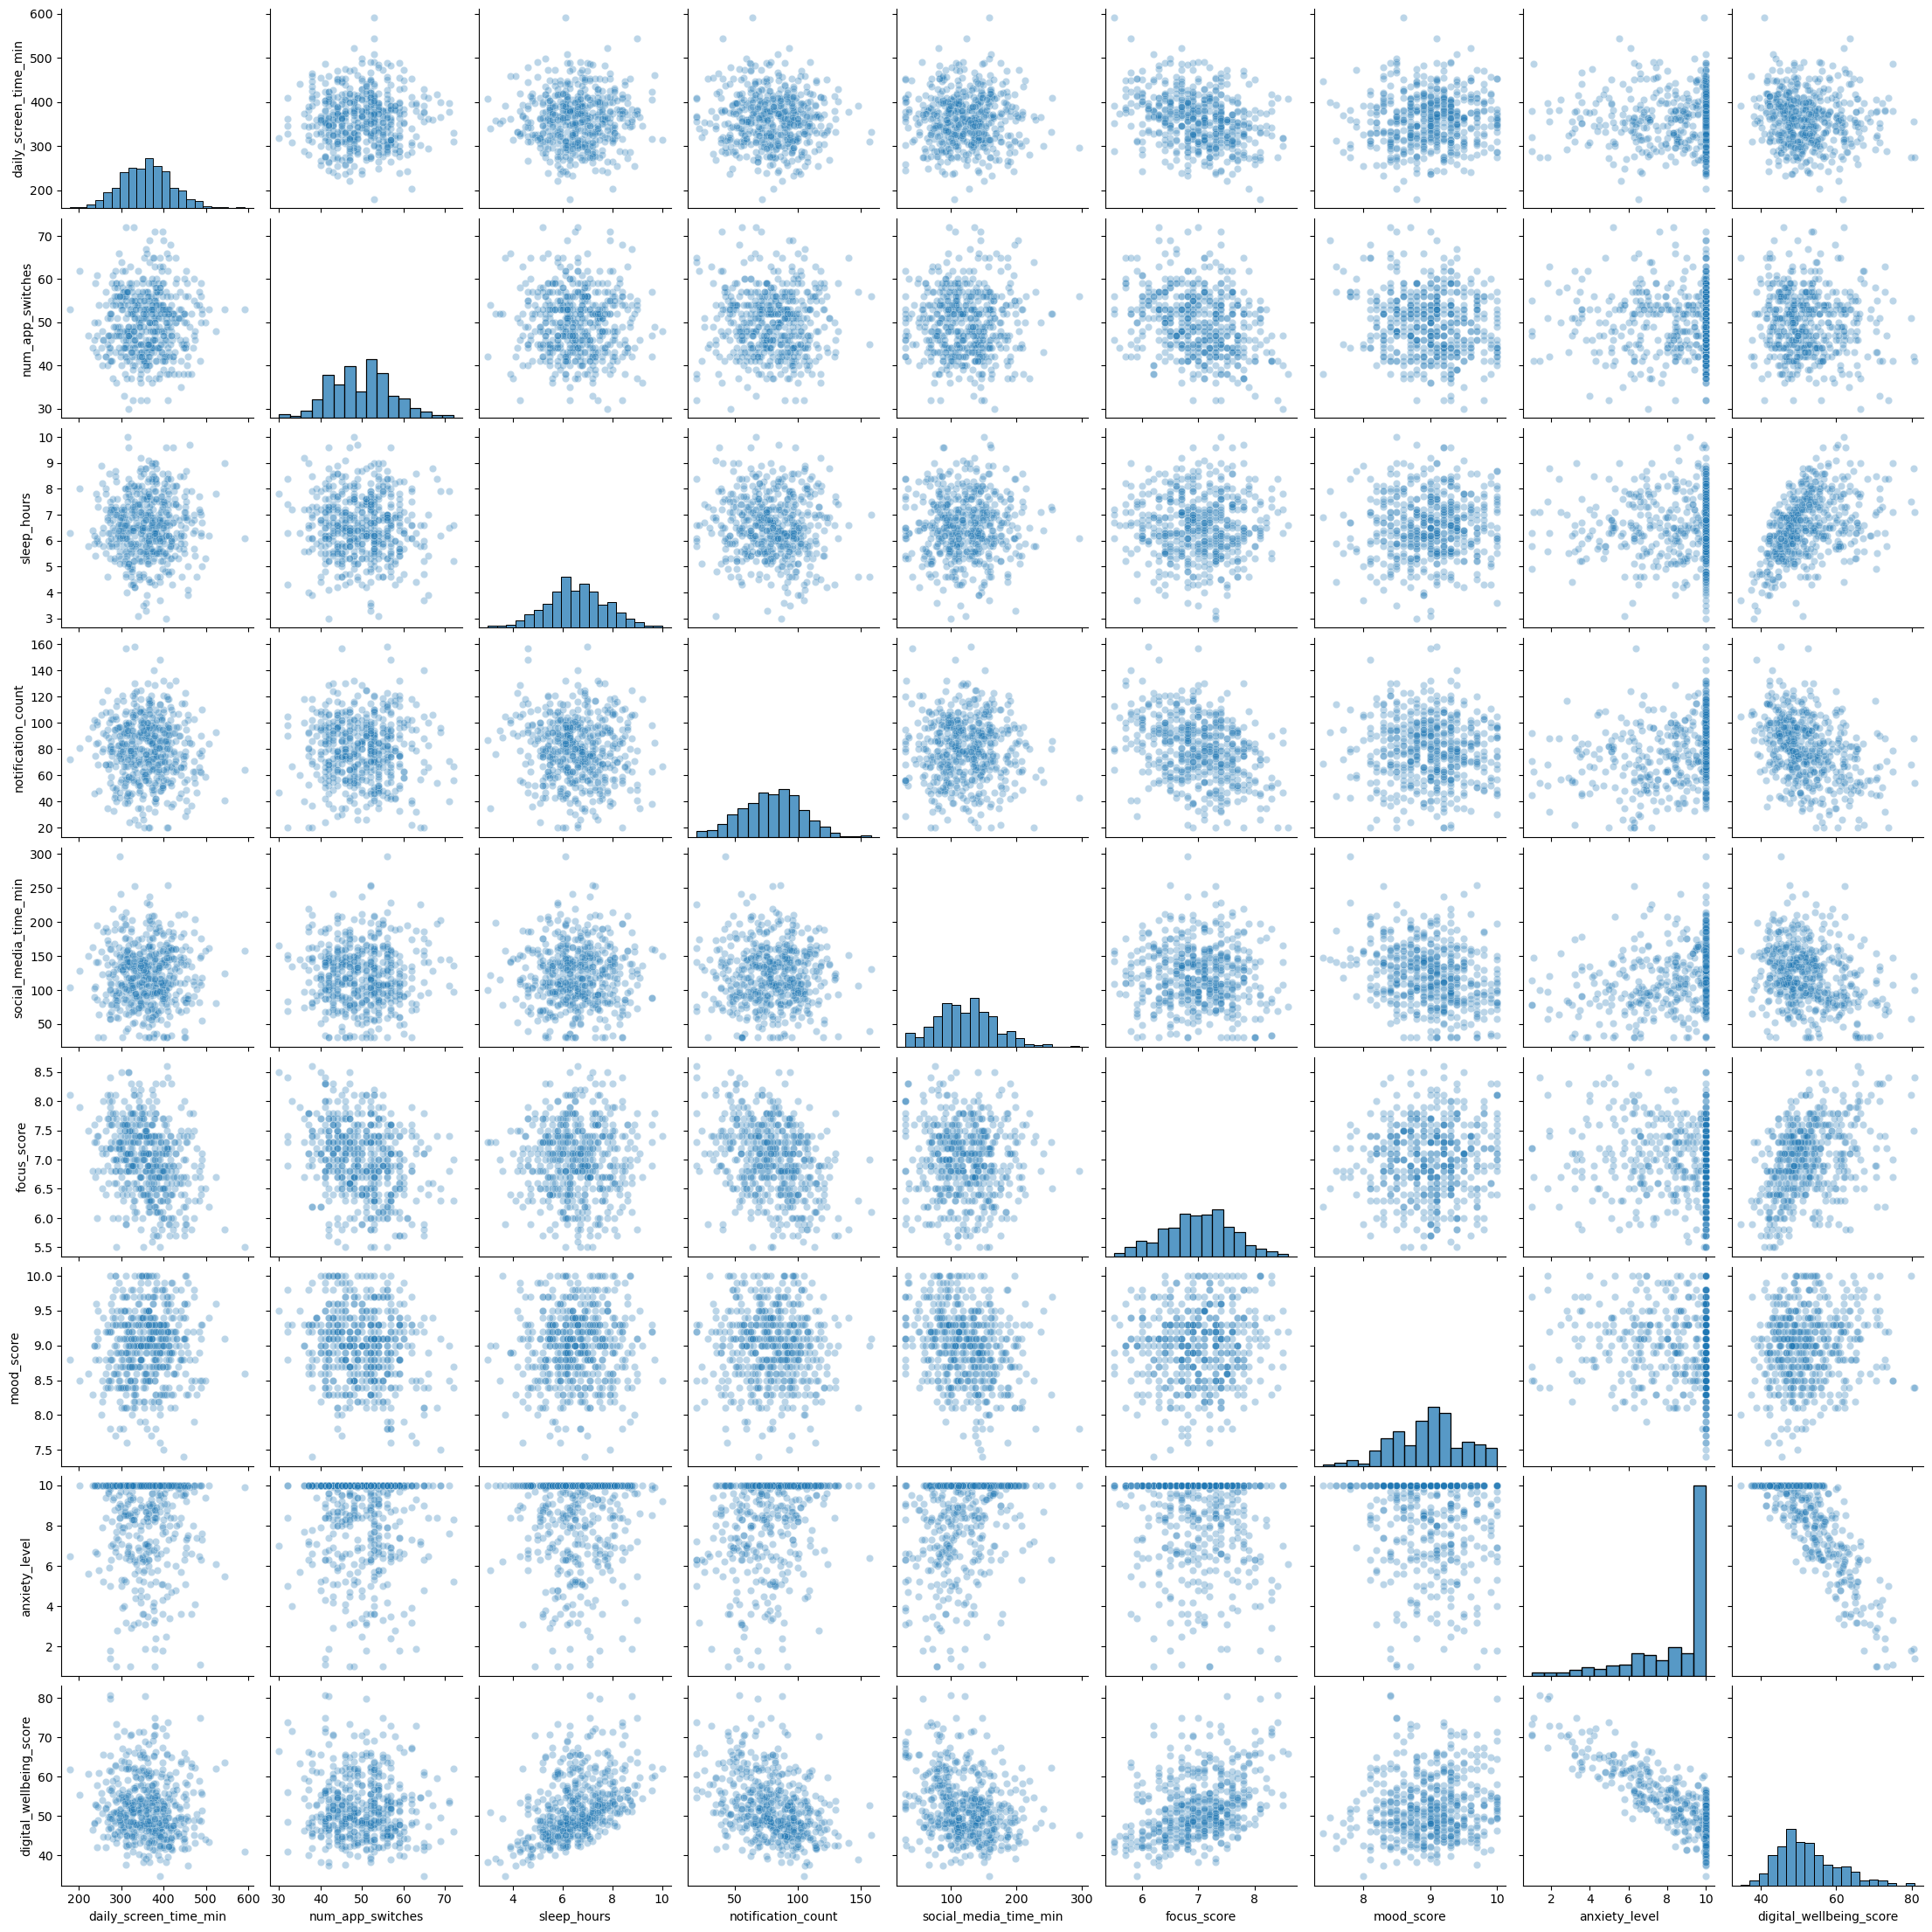

In [14]:
# Pairplot of all numerical variables
# Every distinct variable crossed with every other distinct variable
# Will produce n^2 joint plots, n being the number of variables
sns.pairplot(df, kind = 'scatter', plot_kws = {'alpha' : 0.3})

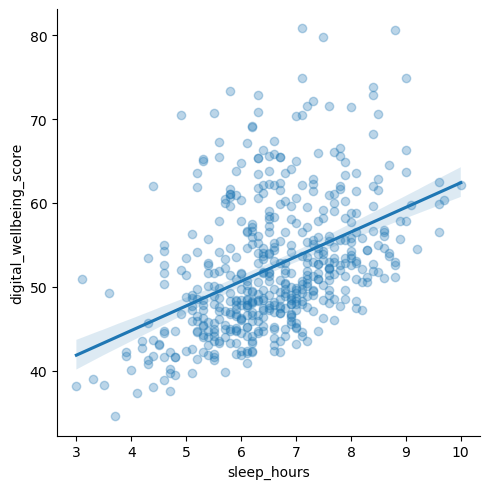

In [15]:
# Inserting a line within a joint plot to indicate a correlation
# Basically, inserts a line that is as close as possible to ALL of the data points
sns.lmplot(x = 'sleep_hours',
           y = 'digital_wellbeing_score',
           data = df,
           scatter_kws = {'alpha' : 0.3})

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[['social_media_time_min', 'focus_score', 'mood_score', 'anxiety_level' ]]
y = df['daily_screen_time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
# Training the model
from sklearn.linear_model import LinearRegression

In [19]:
# lm is OUR linear model, and now we will train it
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
# .coef_ returns all coefficients from our linear model
lm.coef_

array([ -0.0925754 , -25.91930457,   7.04598669,  -1.84055116])

In [22]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coef'])
print(cdf)

                            Coef
social_media_time_min  -0.092575
focus_score           -25.919305
mood_score              7.045987
anxiety_level          -1.840551


In [25]:
# Took a break...
# https://www.youtube.com/watch?v=O2Cw82YR5Bo&ab_channel=AlejandroAO-Software%26Ai
# Left off around 33:00, at beginning of Create Predictions section

In [26]:
predictions = lm.predict(X_test)
predictions
# Returns an array of predictions for the target column based on the column we gave it

array([368.02097968, 366.02495722, 374.91678937, 338.30836154,
       399.47698251, 364.75255265, 380.31626501, 383.9699405 ,
       372.16422309, 362.75695759, 336.26187882, 342.19198641,
       353.75051002, 379.11060374, 364.44705382, 352.38161504,
       377.8426823 , 344.57548444, 381.10112868, 367.9818662 ,
       344.24341939, 396.56368515, 373.09561545, 362.31864289,
       375.94045532, 374.46181393, 344.61010693, 365.5320677 ,
       357.51457041, 358.33520688, 361.35252068, 395.95517036,
       388.00073048, 327.98075371, 372.46984385, 351.50265898,
       361.75570322, 385.52842335, 390.18387979, 375.49316965,
       352.82265803, 357.22650044, 334.71533272, 360.28357356,
       346.73929451, 327.25263468, 360.76068239, 380.53557389,
       374.22466347, 378.69332341, 362.14241592, 364.18429535,
       362.16496253, 363.30762405, 347.4607911 , 370.42790803,
       375.43228345, 334.33100672, 347.63270382, 365.17730204,
       372.00930691, 335.48760347, 364.91113723, 336.47

Text(0.5, 1.0, 'Evaluation of our LM Model')

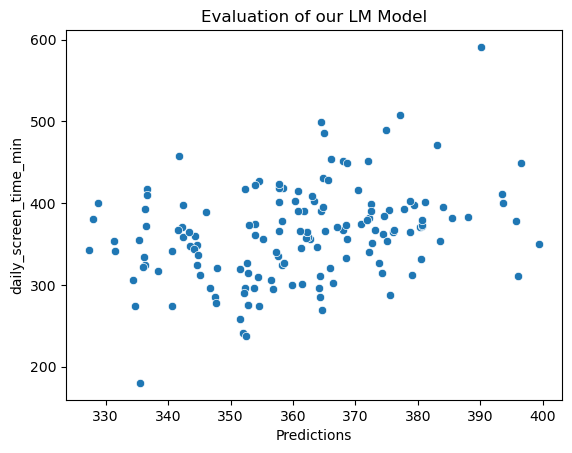

In [35]:
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our LM Model")

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [38]:
# Average distance that each point is from the line 
# (in units of the left side)
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))

# Average distance from each point is squared 
# (the further distances will be more penalized) (in units of the left side)
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))

# Simply the square root of the Mean Absolute Error 
# (in units of the left side)
print("Root Mean Squared Error (RMSE): ", math.sqrt(mean_absolute_error(y_test, predictions)))

Mean Absolute Error:  40.99717686519374
Mean Squared Error:  2930.078459400991
Root Mean Squared Error (RMSE):  6.4029037838463365


In [39]:
# OOPS! That's not good!, those are big [[BIG]] numbers

In [40]:
# Analyze the residuals
# Residuals are the distance/difference between 
# a predicted value and its real value counterpart
residuals = y_test - predictions

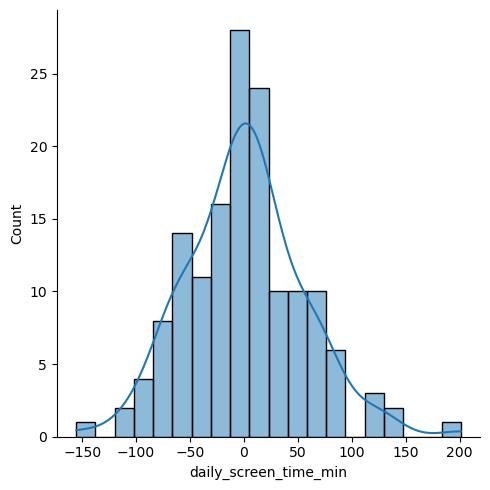

In [53]:
# Now we plot these residuals and see how they are distributed
# Using seaborn
# sns.displot(dataset, num_of_towers, displayGraphCurve?)
sns.displot(residuals, bins = 20, kde = True)

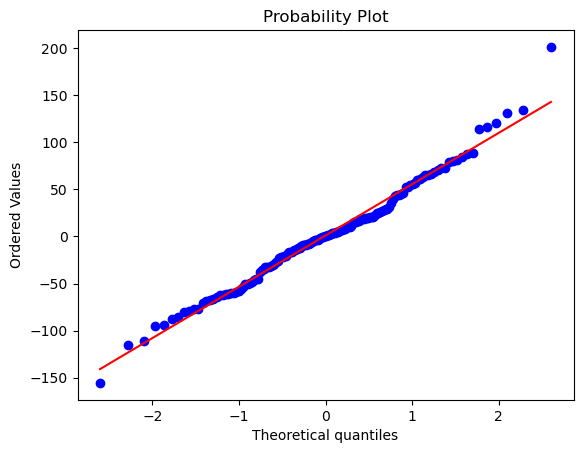

In [57]:
import pylab
import scipy.stats as stats

# The straighter the line, the more normally the
# residuals are distributed
stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.show()

In [ ]:
# See if we can do clustering or k-models on the dataset